In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [308]:
data = pd.read_csv('marketing_campaign.csv')

In [309]:
data.describe()

,Customer_ID,Age,Purchase_Cmp_A,Purchase_Cmp_B
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,36.624000,0.497000,0.442000
std,288.819436,6.913785,0.500241,0.496873
min,1.000000,18.000000,0.000000,0.000000
25%,250.750000,32.000000,0.000000,0.000000
50%,500.500000,36.000000,0.000000,0.000000
75%,750.250000,41.000000,1.000000,1.000000
max,1000.000000,65.000000,1.000000,1.000000


In [310]:
data.describe(include='object')

,Gender
count,1000
unique,2
top,Female
freq,512


##### p-value: Tells, how likely the observed results are due to a random chance

In [311]:
# create a function to get to a conclusion of accepting or rejecting null hypothesis based on p-value

def get_p_value_based_conclusion(p_value, alpha=0.05):
    if p_value <= alpha:
        print('Reject the null hypothesis')  # Reject the null hypothesis
    else:
        print('Falied to reject the null hypothesis')  # Fail to reject the null hypothesis

In [312]:
data.head()

,Customer_ID,Age,Gender,Purchase_Cmp_A,Purchase_Cmp_B
0,1,27,Female,0,1
1,2,35,Male,1,0
2,3,40,Male,0,0
3,4,42,Female,0,0
4,5,38,Male,0,0


In [313]:
def create_hist_plots(distribution1, distribution2, title1, title2, color1, color2):
    plt.figure(figsize=(10, 3))

    plt.subplot(1, 2, 1)
    plt.title(title1)
    sns.histplot(distribution1, bins=15, color=color1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title(title2)
    sns.histplot(distribution2, bins=15, color=color2, alpha=0.5)

    plt.tight_layout()
    plt.show()

## t-tests

#### 1. Compare ages of purchasers in individual campaigns

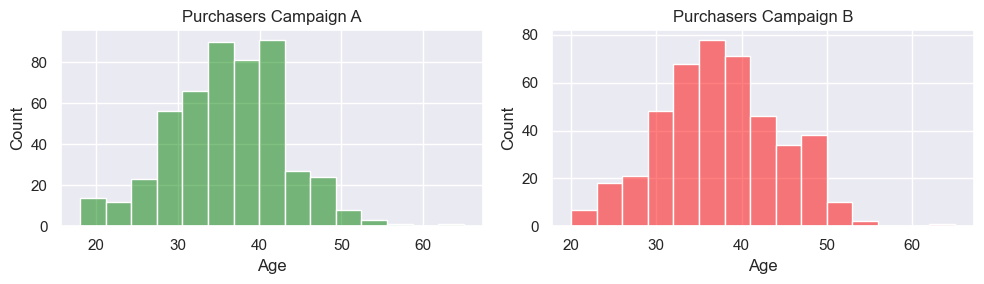

In [314]:
age_purchasers_cmp_A = data[data['Purchase_Cmp_A'] == 1]['Age']
age_purchasers_cmp_B = data[data['Purchase_Cmp_B'] == 1]['Age']

create_hist_plots(age_purchasers_cmp_A, age_purchasers_cmp_B, 'Purchasers Campaign A', 'Purchasers Campaign B', 'green', 'red')

<p style='color: lightgray; font-size: 16px'>
H0: No significant difference between the ages <br>
H1: There is a significant difference between ages
</p>

In [315]:
# perform t-test

t_stat_purchasers, p_value_purchasers = ttest_ind(age_purchasers_cmp_A, age_purchasers_cmp_B)
print(f"Purchasers in Campaign A and B:\n t-statistic: {t_stat_purchasers}\n p-value: {p_value_purchasers}")

Purchasers in Campaign A and B:
 t-statistic: -2.1191626647576856
 p-value: 0.034339226888781646


In [316]:
get_p_value_based_conclusion(p_value_purchasers)

Reject the null hypothesis


<span style='color: #1fd178'>Conclusion: </span>The mean age of Purchasers in Campaign A is significantly lower than the Purchasers in Campaign B

#### 2. Compare ages of those who made a purchase in Campaign A and those who didn't

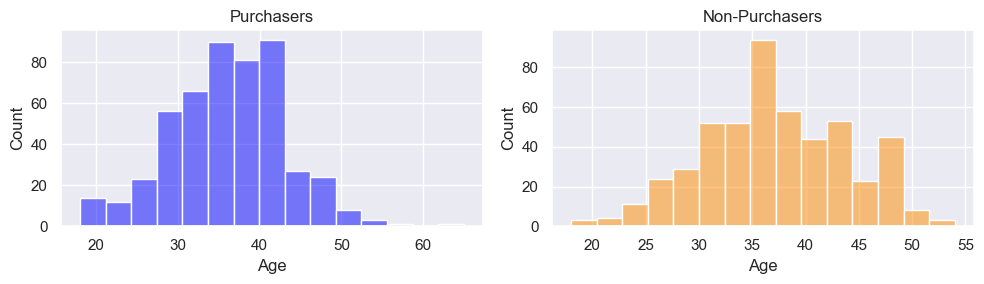

In [317]:
age_purchasers_cmp_A = data[data['Purchase_Cmp_A'] == 1]['Age']
age_non_purchasers_cmp_A = data[data['Purchase_Cmp_A'] == 0]['Age']

create_hist_plots(age_purchasers_cmp_A, age_non_purchasers_cmp_A, 'Purchasers', 'Non-Purchasers', 'blue', 'darkorange')

<p style='color: lightgray; font-size: 16px'>
H0: No significant difference between the ages <br>
H1: There is a significant difference between ages
</p>

In [318]:
t_stat_purchase_A, p_value_purchase_A = ttest_ind(age_purchasers_cmp_A, age_non_purchasers_cmp_A)
print(f"Age by Purchase in Campaign A:\n t-statistic: {t_stat_purchase_A}\n p-value: {p_value_purchase_A}")

Age by Purchase in Campaign A:
 t-statistic: -2.385206157472269
 p-value: 0.017255354410829073


In [319]:
get_p_value_based_conclusion(p_value_purchase_A)

Reject the null hypothesis


<span style='color: #1fd178'>Conclusion: </span>The mean age of Purchasers is significantly lower than Non-Purchasers in Campaign A

#### 3. Compare ages of those who made a purchase in Campaign B and those who didn't

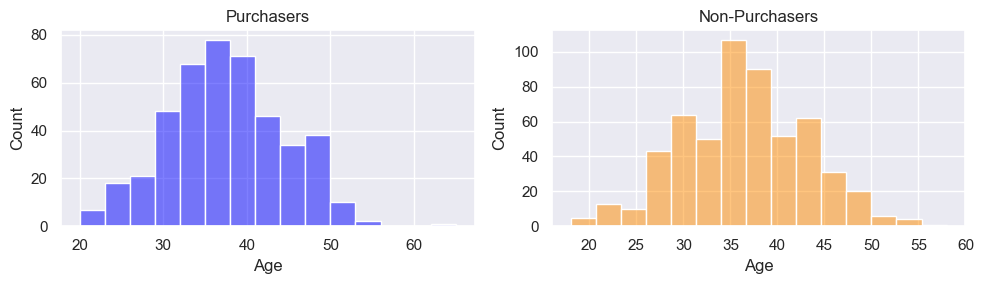

In [320]:
age_purchasers_cmp_B = data[data['Purchase_Cmp_B'] == 1]['Age']
age_non_purchasers_cmp_B = data[data['Purchase_Cmp_B'] == 0]['Age']

create_hist_plots(age_purchasers_cmp_B, age_non_purchasers_cmp_B, 'Purchasers', 'Non-Purchasers', 'blue', 'darkorange')

<p style='color: lightgray; font-size: 16px'>
H0: No significant difference between the ages <br>
H1: There is a significant difference between ages
</p>

In [321]:
t_stat_purchase_B, p_value_purchase_B = ttest_ind(age_purchasers_cmp_B, age_non_purchasers_cmp_B)
print(f"Age by Purchase in Campaign B:\n t-statistic: {t_stat_purchase_B}\n p-value: {p_value_purchase_B}")

Age by Purchase in Campaign B:
 t-statistic: 1.8552255813328962
 p-value: 0.06385873245274262


In [322]:
get_p_value_based_conclusion(p_value_purchase_B)

Falied to reject the null hypothesis


<span style='color: #1fd178'>Conclusion: </span>There is no significant difference between mean ages of Purchasers and Non-Purchasers in Campaign B

## Chi-square Tests

#### 1. Check association between purchases in Campaign A and Campaign B

<Axes: xlabel='Purchase_Cmp_B', ylabel='Purchase_Cmp_A'>

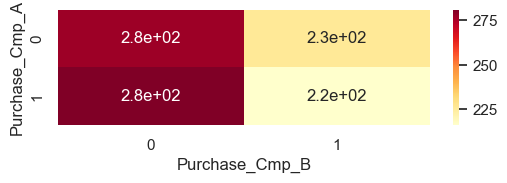

In [323]:
# create contigency table for purchases in both campaigns
purchase_cmp_ct = pd.crosstab(data['Purchase_Cmp_A'], data['Purchase_Cmp_B'])

sns.set(rc={'figure.figsize': (6, 1.5)})
sns.heatmap(purchase_cmp_ct, annot=True, cmap='YlOrRd')

<p style='color: lightgray; font-size: 16px'>
H0: There is no significant difference in the customers for both campaigns <br>
H1: There is a significant difference in the customers
</p>

In [324]:
# perform chi-square test
chi2_stat_purchase, p_value_purchase, dof_purchase, expected_purchase = chi2_contingency(purchase_cmp_ct)
print(f"Chi2 statistic (χ2) : {chi2_stat_purchase}, p-value: {p_value_purchase}, Degree of freedom: {dof_purchase}")

Chi2 statistic (χ2) : 0.16339283295208637, p-value: 0.6860518350440997, Degree of freedom: 1


In [325]:
get_p_value_based_conclusion(p_value_purchase)

Falied to reject the null hypothesis


<span style='color: #1fd178'>Conclusion: </span>There is no association between purchases in both campaigns 

#### 2. Check if there is an association between gender and purchases in Campaign A

<Axes: xlabel='Purchase_Cmp_A', ylabel='Gender'>

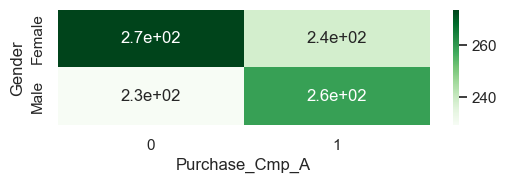

In [326]:
# create contigency table
gender_cmp_A_ct = pd.crosstab(data['Gender'], data['Purchase_Cmp_A'])

sns.set(rc={'figure.figsize': (6, 1.5)})
sns.heatmap(gender_cmp_A_ct, annot=True, cmap='Greens')

<p style='color: lightgray; font-size: 16px'>
H0: No association between gender and purchases in campaign A <br>
H1: There is an association between gender and purchases in Campaign A 
</p>

In [327]:
# perform chi-square test

chi2_stat_gender_A, p_value_gender_A, dof_gender_A, expected_gender_A = chi2_contingency(gender_cmp_A_ct)
print(f"Chi2 statistic (χ2) : {chi2_stat_gender_A}, p-value: {p_value_gender_A}, Degree of freedom: {dof_gender_A}")

Chi2 statistic (χ2) : 4.080085663821602, p-value: 0.04339145891831287, Degree of freedom: 1


In [328]:
get_p_value_based_conclusion(p_value_gender_A)

Reject the null hypothesis


<span style='color: #1fd178'>Conclusion: </span>Males were likely to make a purchase while Females were less likely to make a purchase in campaign B

#### 3. Check if there is an association between gender and purchases in Campaign B

<Axes: xlabel='Purchase_Cmp_B', ylabel='Gender'>

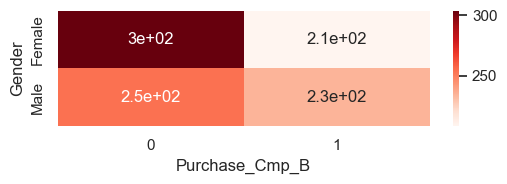

In [329]:
# create contigency table
gender_cmp_B_ct = pd.crosstab(data['Gender'], data['Purchase_Cmp_B'])

sns.set(rc={'figure.figsize': (6, 1.5)})
sns.heatmap(gender_cmp_B_ct, annot=True, cmap='Reds')

<p style='color: lightgray; font-size: 16px'>
H0: No association between gender and purchases in campaign B <br>
H1: There is an association between gender and purchases in Campaign B
</p>

In [330]:
# perform chi-square test
chi2_stat_gender_B, p_value_gender_B, dof_gender_B, expected_gender_B = chi2_contingency(gender_cmp_B_ct)
print(f"Chi2 statistic (χ2) : {chi2_stat_gender_B}, p-value: {p_value_gender_B}, Degree of freedom: {dof_gender_B}")

Chi2 statistic (χ2) : 5.143857394693148, p-value: 0.02332875795903681, Degree of freedom: 1


In [331]:
get_p_value_based_conclusion(p_value_gender_B)

Reject the null hypothesis


<span style='color: #1fd178'>Conclusion: </span>Females were less likely to make a purchase in the Campaign B